# U.S. Medical Insurance Costs

Purpose
Predict insurance spending based on variety of factors!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [8]:
# by sex
female_mean = df[df['sex'] == 'female']['charges'].mean()
male_mean = df[df['sex'] == 'male']['charges'].mean()
sex_mean = pd.DataFrame({'sex':['female', 'male'], 'Charges':[female_mean, male_mean]})

# by region
southwest_mean = df[df['region'] == 'southwest']['charges'].mean()
southeast_mean = df[df['region'] == 'southeast']['charges'].mean()
northwest_mean = df[df['region'] == 'northeast']['charges'].mean()
northeast_mean = df[df['region'] == 'northeast']['charges'].mean()
region_mean = pd.DataFrame({'region':['southwest', 'southeast', 'northwest', 'northeast'], 'Charges':[southwest_mean, southeast_mean, northwest_mean, northeast_mean]})

# by smoking
yes_smoke_mean = df[df['smoker'] == 'yes']['charges'].mean()
no_smoke_mean = df[df['smoker'] == 'no']['charges'].mean()
smoker_mean = pd.DataFrame({'smokes':['yes', 'no'], 'Charges':[yes_smoke_mean, no_smoke_mean]})

Text(0.5, 1.0, 'Region and Charges')

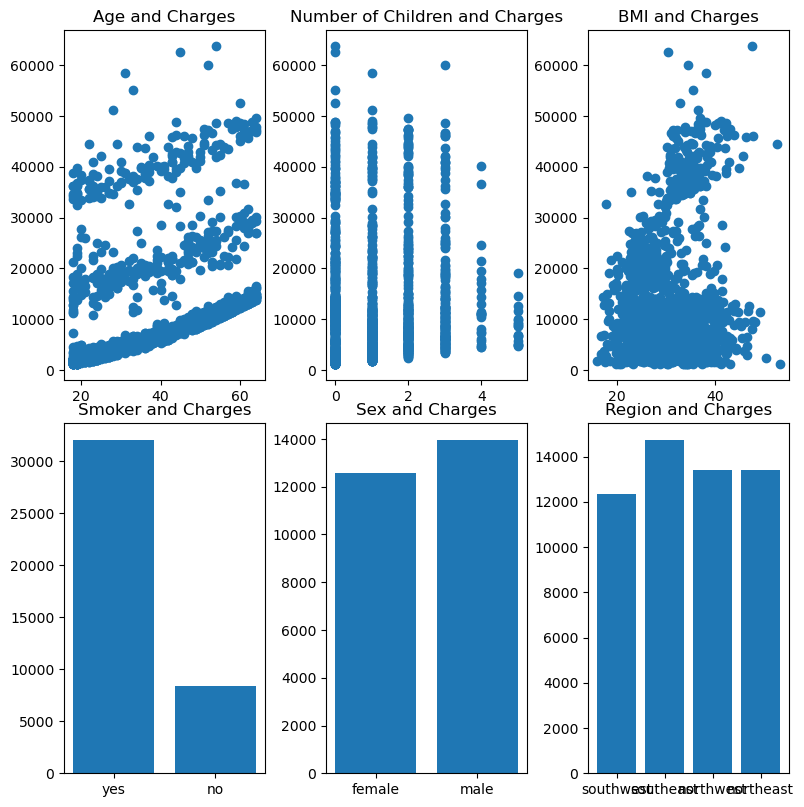

In [7]:
fig, axes = plt.subplots(2,3, figsize = (8,8))
fig.tight_layout(pad = 1)

axes[0,0].scatter(df['age'], df['charges'])
axes[0,0].set_title('Age and Charges')
axes[0,1].scatter(df['children'], df['charges'])
axes[0,1].set_title('Number of Children and Charges')
axes[0,2].scatter(df['bmi'], df['charges'])
axes[0,2].set_title('BMI and Charges')


axes[1,0].bar(smoker_mean['smokes'], smoker_mean['Charges'])
axes[1,0].set_title('Smoker and Charges')
axes[1,1].bar(sex_mean['sex'], sex_mean['Charges'])
axes[1,1].set_title('Sex and Charges')
axes[1,2].bar(region_mean['region'], region_mean['Charges'])
axes[1,2].set_title('Region and Charges')

In [10]:
X = df.drop('charges',axis = 1)
Y = df['charges']

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state= 12)

In [19]:
# turning categorical into dummy variables
categorical_features = ['sex', 'smoker', 'region']
categorical_transformer = Pipeline(steps = [
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [20]:
preprocessor = ColumnTransformer(
    transformers = [
        ('cat', categorical_transformer, categorical_features)
    ])

In [21]:
model = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [22]:
model.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('regressor', LinearRegression())])

In [23]:
y_pred = model.predict(X_test)

In [25]:
MSE = mean_squared_error(Y_test, y_pred)
print('Mean Squared Error: ', MSE)

Mean Squared Error:  57719634.80484134


In [26]:
df_test = X_test
df_test['Charge'] = Y_test

df_pred = X_test
df_pred['Charge'] = y_pred

In [30]:
df_test.head()

,age,sex,bmi,children,smoker,region,Charge
936,44,male,29.735,2,no,northeast,8486.614059
728,18,female,40.280,0,no,northeast,8363.853924
1307,32,male,28.120,4,yes,northwest,31692.565111
924,43,male,23.200,0,no,southwest,8615.697513
137,22,male,25.175,0,no,northwest,7852.981091


Text(0.5, 1.0, 'BMI and Charges')

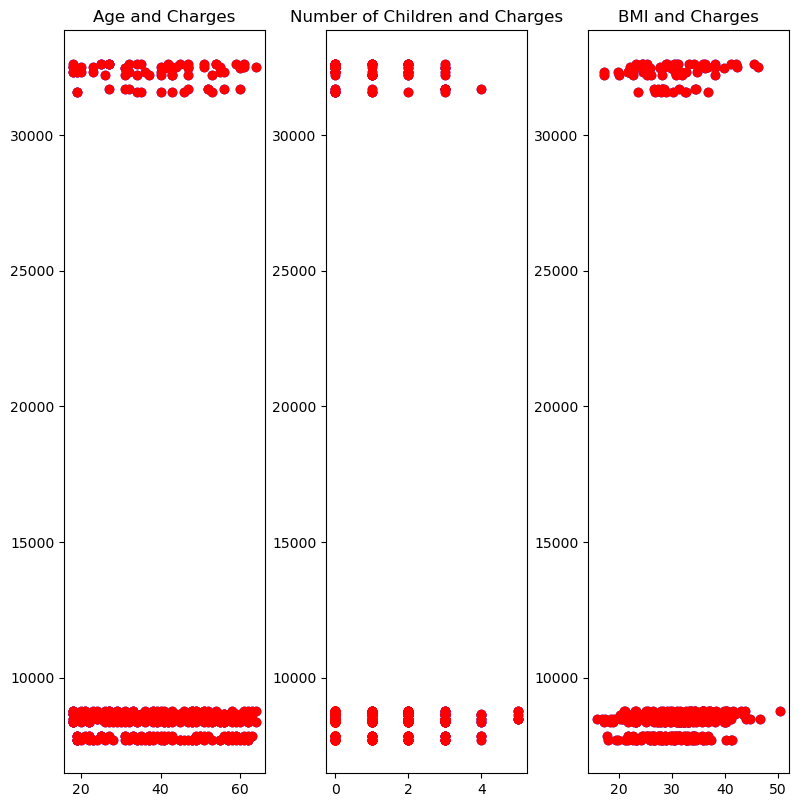

In [33]:
# plt.scatter(df_test['age'], df_test['Charge'], color = 'blue')
# plt.scatter(df_pred['age'], df_pred['Charge'], color = 'red')

fig, axes = plt.subplots(1,3, figsize = (8,8))
fig.tight_layout(pad = 1)

axes[0].scatter(df_test['age'], df_test['Charge'], color = 'blue')
axes[0].scatter(df_pred['age'], df_pred['Charge'], color = 'red')
axes[0].set_title('Age and Charges')
axes[1].scatter(df_test['children'], df_test['Charge'], color = 'blue')
axes[1].scatter(df_pred['children'], df_pred['Charge'], color = 'red')
axes[1].set_title('Number of Children and Charges')
axes[2].scatter(df_test['bmi'], df_test['Charge'], color = 'blue')
axes[2].scatter(df_pred['bmi'], df_pred['Charge'], color = 'red')
axes[2].set_title('BMI and Charges')


# axes[1,0].bar(smoker_mean['smokes'], smoker_mean['Charges'])
# axes[1,0].set_title('Smoker and Charges')
# axes[1,1].bar(sex_mean['sex'], sex_mean['Charges'])
# axes[1,1].set_title('Sex and Charges')
# axes[1,2].bar(region_mean['region'], region_mean['Charges'])
# axes[1,2].set_title('Region and Charges')